In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
model = AbstractModel()
model.N =Param(mutable=True) 
model.Nc =Param(mutable=True) 

model.i = RangeSet(1,model.N)
model.j = Set(initialize=model.i)

model.U = Var(model.i,within=Binary)
model.link = Var(model.i,model.j,within=Binary)

model.OF = Var(within=NonNegativeReals, initialize=5)
def initval(model,i):
    return random.uniform(0,1)
model.Xloc=Param(model.i,  within=NonNegativeReals, initialize=initval,mutable=True)
model.Yloc=Param(model.i,  within=NonNegativeReals, initialize=initval, mutable=True)


def Ncenters_rule(model):
    return sum(model.U[i] for i in model.i)==model.Nc
model.eq1=Constraint(rule=Ncenters_rule)

def eq2_rule(model,i):
    return sum(model.link[i,j] if i!=j else 0 for j in model.j)==1
model.eq2=Constraint(model.i,rule=eq2_rule)

def eq3_rule(model,i,j):
    if i!=j:
        return model.link[i,j] <= model.U[j]+model.U[i]
    else:
        return Constraint.Skip
model.eq3=Constraint(model.i,model.j,rule=eq3_rule)

def rule_OF(model):
    return model.OF==sum(model.link[i,j]*((model.Xloc[i]-model.Xloc[j])**2+(model.Yloc[i]-model.Yloc[j])**2) if i!=j else 0 for i in model.i for j in model.j)
model.C   = Constraint(rule=rule_OF)

model.obj1 = Objective(expr=model.OF, sense=minimize)
opt = SolverFactory('glpk')
#instance.display()

In [3]:
model.N=20
model.Nc=3

In [4]:
#instance = model.create_instance("/Users/alirezasoroudi/Dropbox/pythonfiles save/ex16data.dat")
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
print('OF= ',value(instance.obj1))

OF=  0.859382870060459


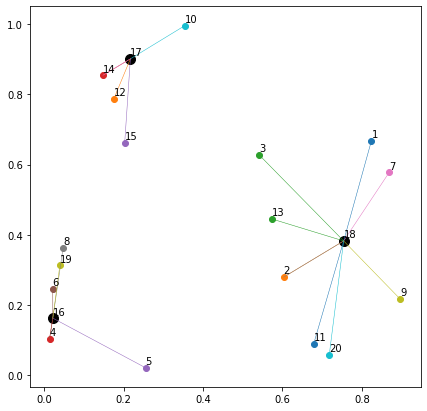

In [5]:
fig = plt.figure(figsize=(7,7))
Xc=np.linspace(0,1,100);
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),label=str(i)) 
    plt.text(value(instance.Xloc[i]),0.01+value(instance.Yloc[i]),str(i))
    if value(instance.U[i])>=0.99:
        plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),color='black', s=100) 

for i in instance.i:
    for j in instance.j:
        if i!=j:
            if value(instance.link[i,j])>0.99:
               # print(i,j)
                startP=[value(instance.Xloc[i]),value(instance.Xloc[j])]
                endP=[value(instance.Yloc[i]),value(instance.Yloc[j])]
                plt.plot(startP,endP,lw=0.5) 
#plt.legend()
#plt.xlim(0,1)
#plt.ylim(0,1)

OF=  2.25878177573728
OF=  0.651664751271229
OF=  0.406013547634267
OF=  0.341027940955943


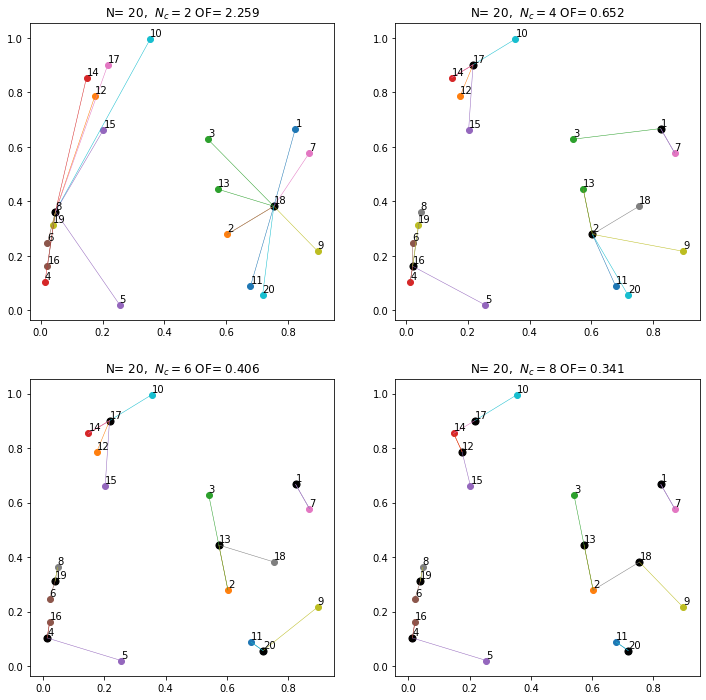

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
Ncvec=[2,4,6,8]

for counter in range(0,len(Ncvec)):
    plt.subplot(2, 2, counter+1)
    instance.Nc=Ncvec[counter]
    results = opt.solve(instance) # solves and updates instance
    OF=round(value(instance.obj1),3)
    plt.title('N= '+str(value(instance.N)) +',  $N_c=$' + str(Ncvec[counter])+ ' OF= '+ str(OF))
    print('OF= ',value(instance.obj1))

    for i in instance.i:
        plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),label=str(i)) 
        plt.text(value(instance.Xloc[i]),0.01+value(instance.Yloc[i]),str(i))
        if value(instance.U[i])>=0.99:
            plt.scatter(value(instance.Xloc[i]),value(instance.Yloc[i]),color='black', s=50) 

    for i in instance.i:
        for j in instance.j:
            if i!=j:
                if value(instance.link[i,j])>0.99:
                    startP=[value(instance.Xloc[i]),value(instance.Xloc[j])]
                    endP=[value(instance.Yloc[i]),value(instance.Yloc[j])]
                    plt.plot(startP,endP,lw=0.5) 

In [7]:
instance.eq2.pprint()

eq2 : Size=20, Index=i, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                           : Upper : Active
      1 :   1.0 :                   link[1,2] + link[1,3] + link[1,4] + link[1,5] + link[1,6] + link[1,7] + link[1,8] + link[1,9] + link[1,10] + link[1,11] + link[1,12] + link[1,13] + link[1,14] + link[1,15] + link[1,16] + link[1,17] + link[1,18] + link[1,19] + link[1,20] :   1.0 :   True
      2 :   1.0 :                   link[2,1] + link[2,3] + link[2,4] + link[2,5] + link[2,6] + link[2,7] + link[2,8] + link[2,9] + link[2,10] + link[2,11] + link[2,12] + link[2,13] + link[2,14] + link[2,15] + link[2,16] + link[2,17] + link[2,18] + link[2,19] + link[2,20] :   1.0 :   True
      3 :   1.0 :                   link[3,1] + link[3,2] + link[3,4] + link[3,5] + link[3,6] 